In [2]:
#  Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#  Load Data
df = pd.read_excel("crop yield data sheet.xlsx")

In [4]:
df.head()

,Rain Fall (mm),Fertilizer,Temperatue,Nitrogen (N),Phosphorus (P),Potassium (K),Yeild (Q/acre)
0,1230.0,80.0,28,80.0,24.0,20.0,12.0
1,480.0,60.0,36,70.0,20.0,18.0,8.0
2,1250.0,75.0,29,78.0,22.0,19.0,11.0
3,450.0,65.0,35,70.0,19.0,18.0,9.0
4,1200.0,80.0,27,79.0,22.0,19.0,11.0


In [5]:
df.shape

(109, 7)

In [6]:
df.isnull().sum()

Rain Fall (mm)    10
Fertilizer        10
Temperatue         9
Nitrogen (N)      10
Phosphorus (P)    10
Potassium (K)     10
Yeild (Q/acre)    10
dtype: int64

In [7]:
df.nunique()

Rain Fall (mm)    25
Fertilizer        19
Temperatue        14
Nitrogen (N)      21
Phosphorus (P)     8
Potassium (K)      8
Yeild (Q/acre)    13
dtype: int64

In [8]:
# renaming colums to correct spelling mistakes
df.rename(columns={"Temperatue":"Temperature","Yeild (Q/acre)":"Yield (Q/acre)"}, inplace=True)

In [9]:
df.head()

,Rain Fall (mm),Fertilizer,Temperature,Nitrogen (N),Phosphorus (P),Potassium (K),Yield (Q/acre)
0,1230.0,80.0,28,80.0,24.0,20.0,12.0
1,480.0,60.0,36,70.0,20.0,18.0,8.0
2,1250.0,75.0,29,78.0,22.0,19.0,11.0
3,450.0,65.0,35,70.0,19.0,18.0,9.0
4,1200.0,80.0,27,79.0,22.0,19.0,11.0


In [10]:
# Dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Rain Fall (mm)  99 non-null     float64
 1   Fertilizer      99 non-null     float64
 2   Temperature     100 non-null    object 
 3   Nitrogen (N)    99 non-null     float64
 4   Phosphorus (P)  99 non-null     float64
 5   Potassium (K)   99 non-null     float64
 6   Yield (Q/acre)  99 non-null     float64
dtypes: float64(6), object(1)
memory usage: 6.1+ KB


from the data it is observed that all columns are numerical columns however datatype of "Temperature" column is object which is wrong. Need to check.

In [11]:
df["Temperature"].value_counts()

Temperature
28    20
39    14
37    10
38    10
27    10
29     9
36     8
26     7
24     4
40     4
34     1
35     1
25     1
:      1
Name: count, dtype: int64

temperature contains 1 invalid value ":". Dropping that value and dropping Null values too 

In [13]:
df.drop(df[(df["Temperature"]==":")|(df["Temperature"].isna())].index, inplace=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Rain Fall (mm)  99 non-null     float64
 1   Fertilizer      99 non-null     float64
 2   Temperature     99 non-null     object 
 3   Nitrogen (N)    99 non-null     float64
 4   Phosphorus (P)  99 non-null     float64
 5   Potassium (K)   99 non-null     float64
 6   Yield (Q/acre)  99 non-null     float64
dtypes: float64(6), object(1)
memory usage: 5.5+ KB


In [15]:
df.isnull().sum()

Rain Fall (mm)    0
Fertilizer        0
Temperature       0
Nitrogen (N)      0
Phosphorus (P)    0
Potassium (K)     0
Yield (Q/acre)    0
dtype: int64

In [17]:
# Convert "Temperature" column to Numeric
df["Temperature"]=df["Temperature"].astype(np.float64)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Rain Fall (mm)  99 non-null     float64
 1   Fertilizer      99 non-null     float64
 2   Temperature     99 non-null     float64
 3   Nitrogen (N)    99 non-null     float64
 4   Phosphorus (P)  99 non-null     float64
 5   Potassium (K)   99 non-null     float64
 6   Yield (Q/acre)  99 non-null     float64
dtypes: float64(7)
memory usage: 5.5 KB


# EDA

In [18]:
# Missing Values
df.isnull().sum()

Rain Fall (mm)    0
Fertilizer        0
Temperature       0
Nitrogen (N)      0
Phosphorus (P)    0
Potassium (K)     0
Yield (Q/acre)    0
dtype: int64

In [19]:
# Summary Statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rain Fall (mm),99.0,849.797980,400.042676,400.0,450.0,1150.0,1237.5,1300.0
Fertilizer,99.0,67.808081,10.028202,50.0,60.0,70.0,77.0,80.0
Temperature,99.0,32.393939,5.426350,24.0,28.0,29.0,38.0,40.0
Nitrogen (N),99.0,70.737374,6.677079,59.0,65.0,71.0,77.0,80.0
Phosphorus (P),99.0,21.131313,1.951695,18.0,19.5,21.0,23.0,25.0
Potassium (K),99.0,18.060606,1.817254,15.0,16.0,19.0,19.0,22.0
Yield (Q/acre),99.0,9.050505,1.965902,5.5,7.0,9.0,11.0,12.0


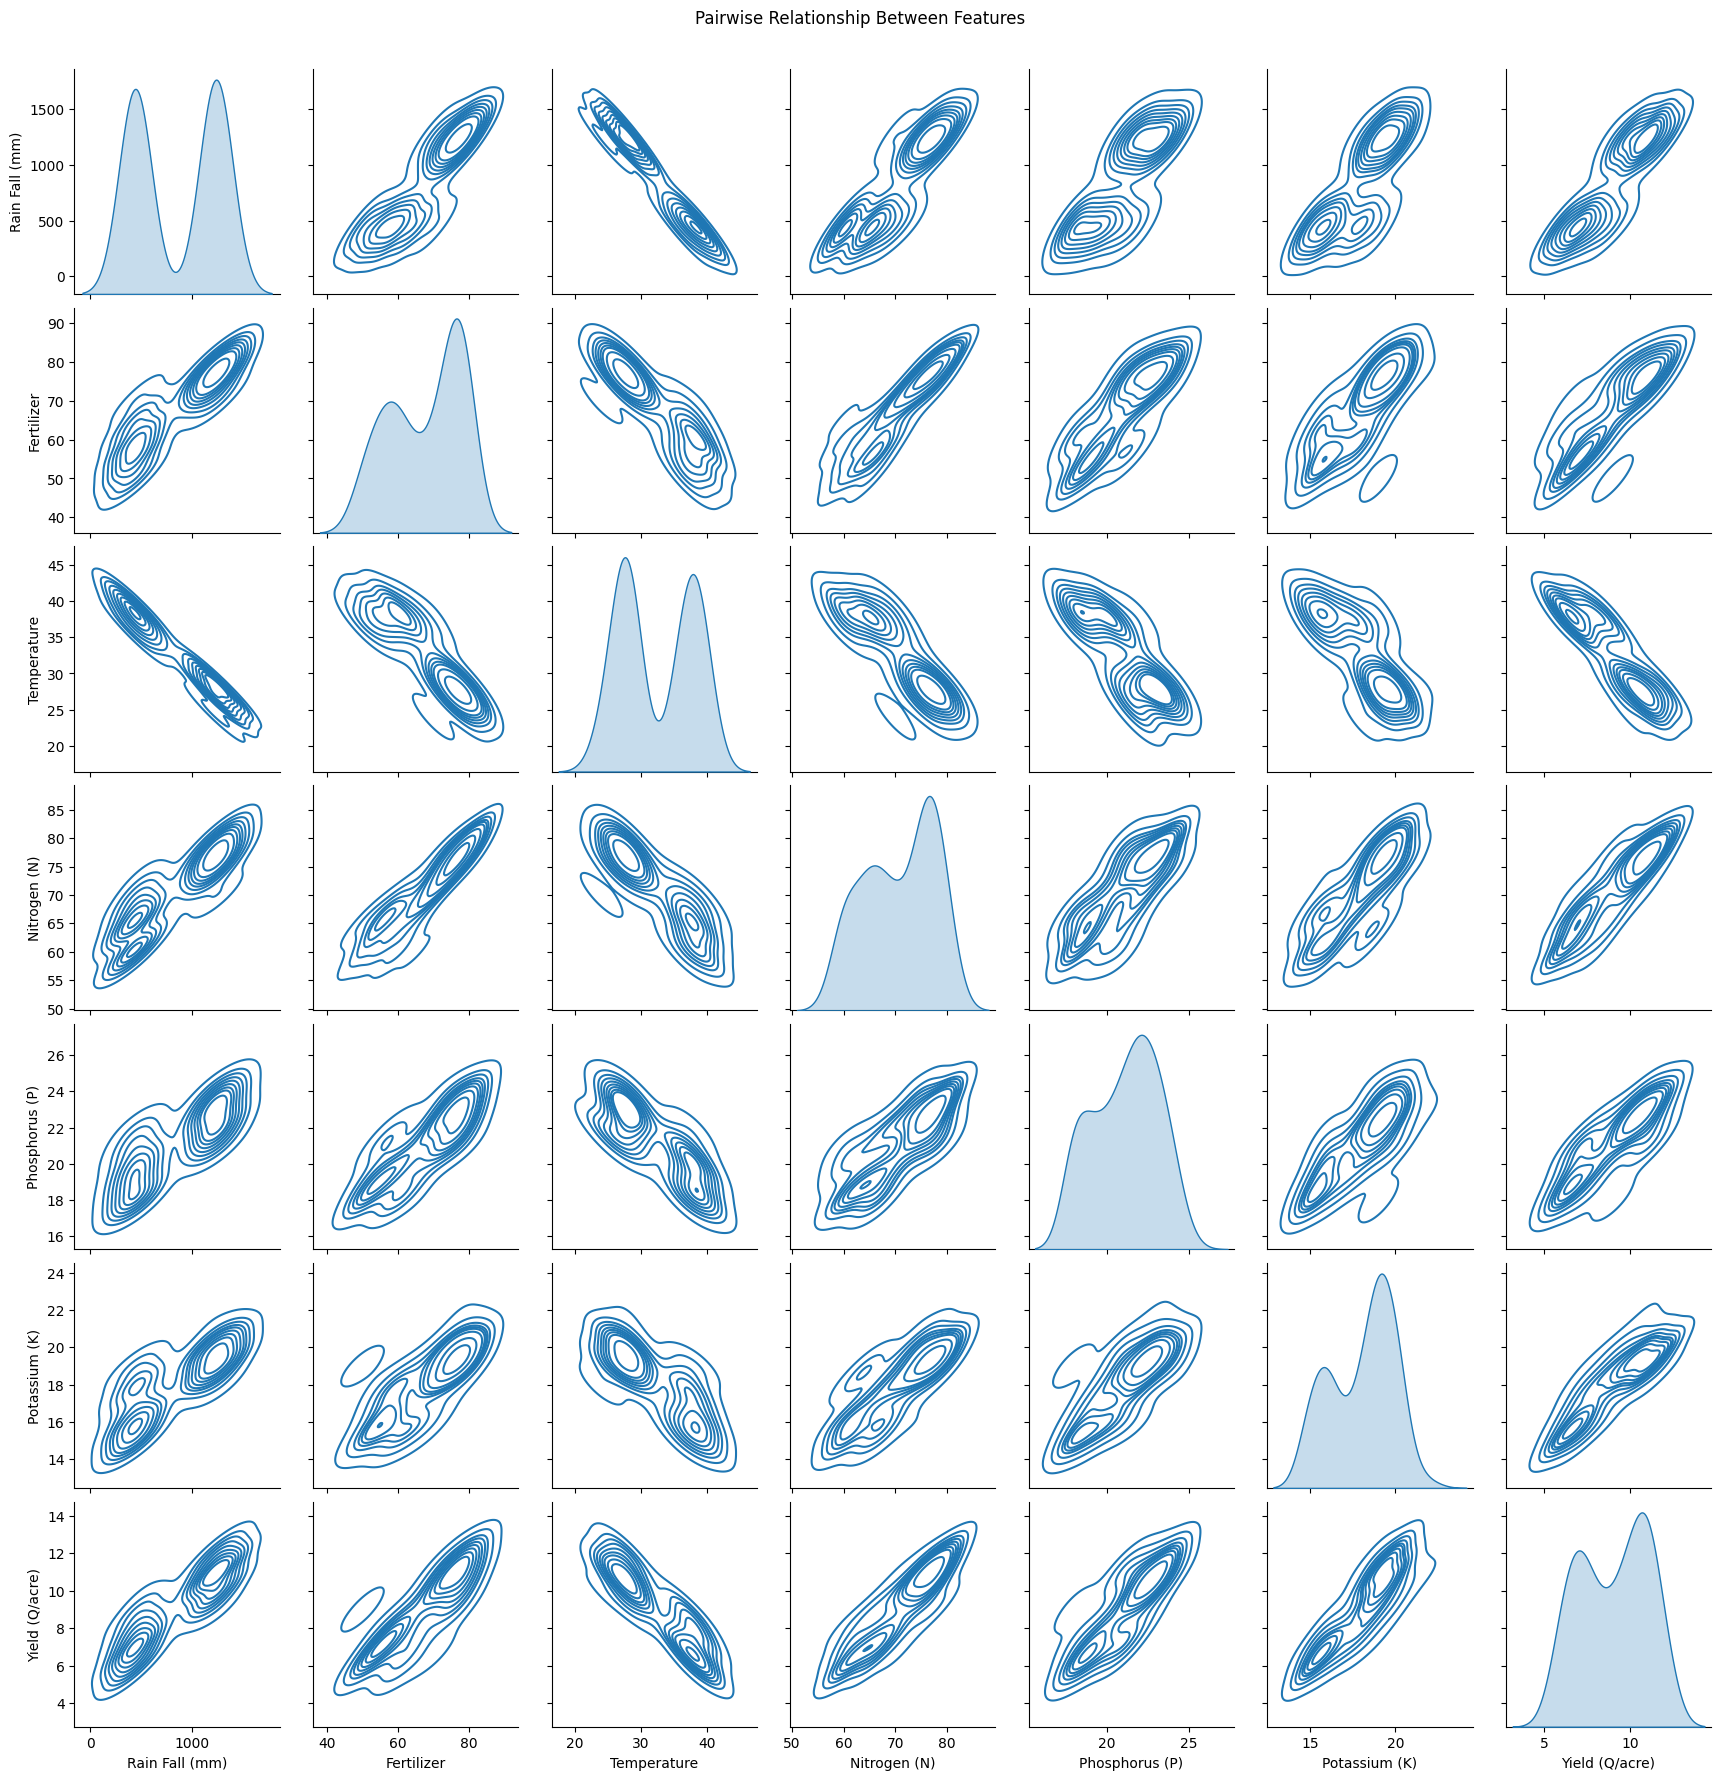

<Figure size 640x480 with 0 Axes>

In [90]:
# Pairplot Numeric Relationships
sns.pairplot(data=df, kind="kde")
plt.suptitle("Pairwise Relationship Between Features", y=1.02)
plt.show()
plt.savefig("outputs/plots/Pairwise_Relationships.png",dpi=300)


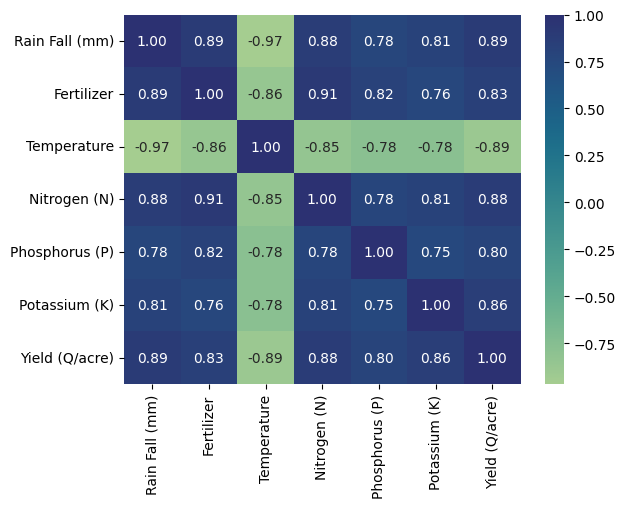

In [89]:
# Correlation Heatmap

sns.heatmap(data= df.corr(),annot=True, cmap="crest", fmt=".2f")
plt.savefig("outputs/plots/heatmap.png",dpi=300)

From the correlation heatmap, it is observed that most features are strongly correlated, indicating the presence of multicollinearity. This suggests that the dataset contains redundant information among predictors. To address this, highly correlated features can be removed or transformed using techniques such as Principal Component Analysis (PCA) or regularization methods like Lasso or Ridge regression. However We will use tree based models as they handle correlation well.

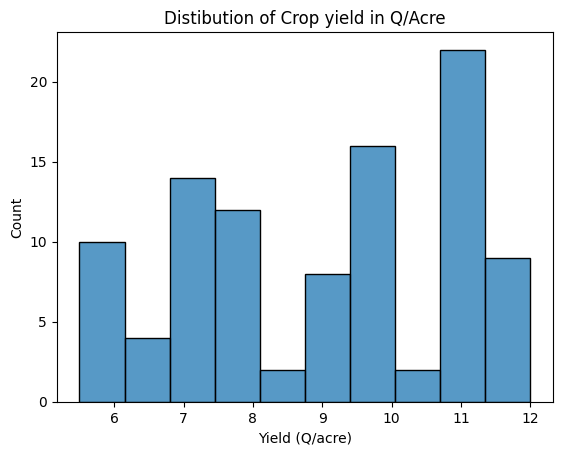

In [86]:
# Distribution of target variable
sns.histplot(data=df["Yield (Q/acre)"],bins=10)
plt.title("Distibution of Crop yield in Q/Acre")
plt.savefig("outputs/plots/Distribution_of_Crop_Yield.png",dpi=300)

In [81]:
import os

# Create directories if they don't exist
os.makedirs("outputs/plots", exist_ok=True)
os.makedirs("outputs/models", exist_ok=True)
os.makedirs("outputs/reports", exist_ok=True)

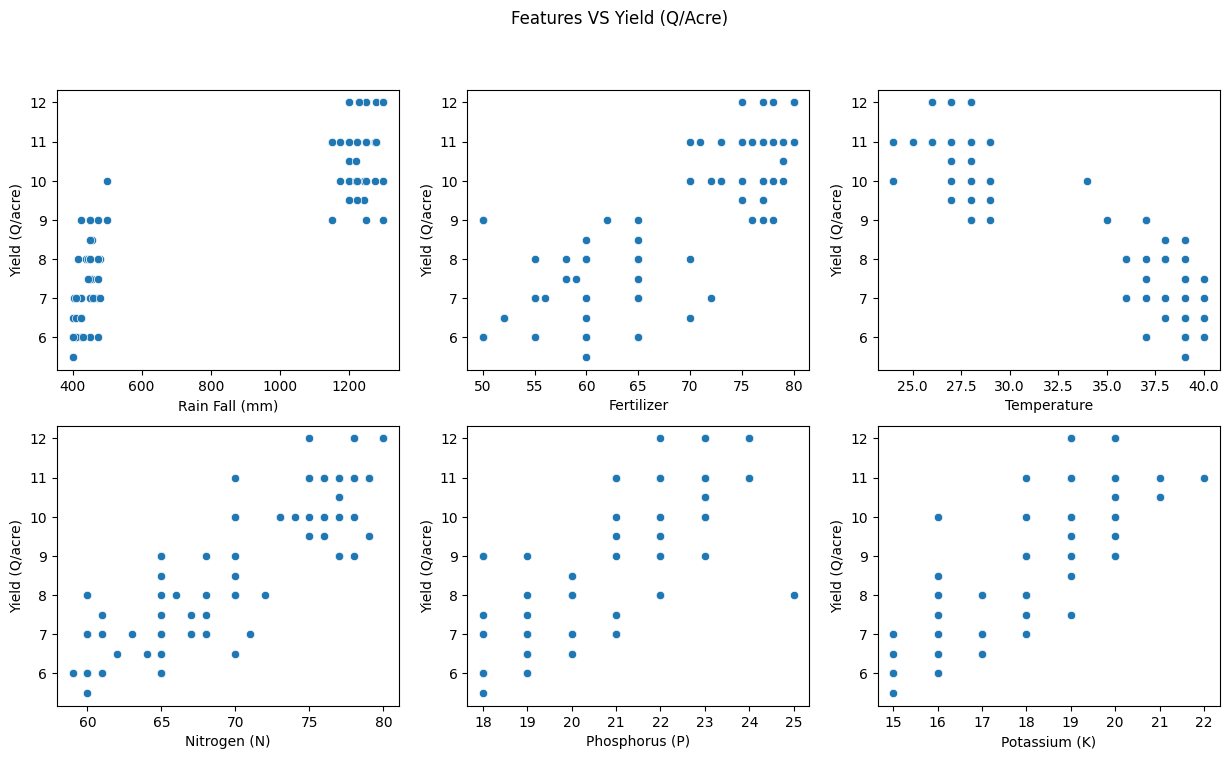

In [82]:
# Relationship plots

fig, axes = plt.subplots(2,3, figsize=(15,8))
axes = axes.flatten()

plt.suptitle("Features VS Yield (Q/Acre)")
for i, feat in enumerate(feature_list):
    sns.scatterplot(x=df[feat], y=df["Yield (Q/acre)"], ax=axes[i])

# Now save the plot
plt.savefig("outputs/plots/Features_VS_Yield_(Q_Acre).png", dpi=300)

In [61]:
# Feature Target Split
X = df.drop(columns=["Yield (Q/acre)"],axis=1)
y = df["Yield (Q/acre)"]

In [52]:
# Preprocessing pipelines
numeric_features = X.select_dtypes(include=[np.number]).columns.to_list()
categorical_features = X.select_dtypes(exclude=[np.number]).columns.to_list()
print("numeric_features:\n",numeric_features)
print("categorical_features:\n",categorical_features)

numeric_features:
 ['Rain Fall (mm)', 'Fertilizer', 'Temperature', 'Nitrogen (N)', 'Phosphorus (P)', 'Potassium (K)']
categorical_features:
 []


In [56]:
# Preprocessing pipelines

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# For numeric features strategy = median impute + scaling
num_transformer = Pipeline(steps=[("Imputer",SimpleImputer(strategy="median")),
                                  ("Scaler",StandardScaler())
                                  ])
# For categorical features strategy = mode impute + one-hot encode
cat_transformer = Pipeline(steps=[("Imputer",SimpleImputer(strategy="most_frequent")),
                                  ("OHE",OneHotEncoder(handle_unknown="ignore"))
                                  ])
# Combine both
pre_processor = ColumnTransformer(transformers=[
                                                ("num_transformer",num_transformer,numeric_features),
                                                ("cat_transformer",cat_transformer,categorical_features)
                                                ])

In [ ]:
# Define and Bild Model pipelines
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

models = {
    "LinearRegression": LinearRegression(),
    "RandomForest": RandomForestRegressor(n_estimators=200, random_state=42),
    "GBR": GradientBoostingRegressor(n_estimators=200, random_state=42)
}

pipelines = {
    name: Pipeline(steps=[
        ('preprocessor', pre_processor),
        ('model', model)
    ]) for name, model in models.items()
}

In [64]:
# Train Test Split
from sklearn.model_selection import train_test_split, cross_val_score
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
print("X_train Shape: ", X_train.shape)
print("X_test Shape: ", X_test.shape)

X_train Shape:  (79, 6)
X_test Shape:  (20, 6)


In [66]:
from math import sqrt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

results = {}

for name, pipe in pipelines.items():
    pipe.fit(X_train, y_train)
    preds = pipe.predict(X_test)

    mse = mean_squared_error(y_test, preds)
    rmse = sqrt(mse)
    mae = mean_absolute_error(y_test, preds)
    r2 = r2_score(y_test, preds)

    cv = cross_val_score(pipe, X, y, cv=5, scoring='r2')
    results[name] = {
        "RMSE": rmse,
        "MAE": mae,
        "R2": r2,
        "CV_R2_mean": cv.mean(),
        "CV_R2_std": cv.std()
    }

    print(f"✅ {name}: RMSE={rmse:.2f}, MAE={mae:.2f}, R²={r2:.3f}, CV_R²={cv.mean():.3f}±{cv.std():.3f}")

pd.DataFrame(results).T


✅ LinearRegression: RMSE=0.66, MAE=0.51, R²=0.906, CV_R²=0.792±0.198
✅ RandomForest: RMSE=0.73, MAE=0.58, R²=0.887, CV_R²=0.832±0.109
✅ GBR: RMSE=0.66, MAE=0.53, R²=0.907, CV_R²=0.813±0.131


,RMSE,MAE,R2,CV_R2_mean,CV_R2_std
LinearRegression,0.663246,0.512433,0.906043,0.792118,0.198004
RandomForest,0.727127,0.579875,0.887072,0.831743,0.108775
GBR,0.659712,0.533262,0.907042,0.813117,0.131358


From the above results it is observed that Gradient Boost Regressor is performing better with Highest R2 score and Lowest mean square error.  

# Hyperparatmeter tuning of Random Forest using GridSearchCV

In [91]:
from sklearn.model_selection import GridSearchCV
gbr_pipeline = Pipeline(steps=[("pre_processor",pre_processor),
                              ("model",GradientBoostingRegressor(random_state=42))
                              ])

param_grid = {
  "model__n_estimators": [100, 200, 300],
  "model__learning_rate":[0.01,0.05,0.1],
  "model__max_depth": [3, 5, 7],
  "model__min_samples_split": [2,5,10],
  "model__min_samples_leaf": [1, 2, 4],
  "model__subsample":[0.8,1.0]
}


#GridSearchCV with 5 folds
grid_search = GridSearchCV(estimator=gbr_pipeline,
                           param_grid=param_grid,                           
                           cv=5, 
                           verbose=2,
                           scoring="r2", 
                           n_jobs=-1)

grid_search.fit(X_train,y_train)

print("Best Parameters: ", grid_search.best_params_)
print("Best CV r2 score: ", grid_search.best_score_)


Fitting 5 folds for each of 486 candidates, totalling 2430 fits
Best Parameters:  {'model__learning_rate': 0.01, 'model__max_depth': 3, 'model__min_samples_leaf': 1, 'model__min_samples_split': 2, 'model__n_estimators': 300, 'model__subsample': 1.0}
Best CV r2 score:  0.8344223844616497


In [93]:
# Save the best Model
import joblib
best_model = grid_search.best_estimator_
joblib.dump(best_model, "outputs/models/best_crop_yield_model.pkl")
print("💾 Model saved as best_crop_yield_model.pkl")

💾 Model saved as best_crop_yield_model.pkl


In [94]:
# Save grid search results
results_df = pd.DataFrame(grid_search.cv_results_)
results_df.to_csv("outputs/reports/gridsearch_results.csv", index=False)
print("📊 GridSearchCV results saved as outputs/reports/gridsearch_results.csv")

📊 GridSearchCV results saved as outputs/reports/gridsearch_results.csv


In [96]:
report = {
    "Best_Model": str(best_model.named_steps['model']),
    "Best_Params": grid_search.best_params_,
    "CV_R2": round(grid_search.best_score_, 4),
    "Test_R2": round(r2, 4),
    "Test_RMSE": round(rmse, 4),
    "Test_MAE": round(mae, 4)
}

pd.DataFrame([report]).to_excel("outputs/reports/final_model_report.xlsx", index=False)
print("🧾 Final report saved as outputs/reports/final_model_report.xlsx")


🧾 Final report saved as outputs/reports/final_model_report.xlsx
